In [7]:
import geopandas as gpd
from osgeo import ogr
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier

In [42]:
# 读取 Geodatabase 格式数据
fjgdb_file = "./fjgdb/福建省地图示意图版.gdb/"
fjgdb = ogr.Open(fjgdb_file)

In [19]:
# 获取各个图层的名称
lyr_size = fjgdb.GetLayerCount()
for i in range(lyr_size):
    lyr = fjgdb.GetLayerByIndex(i)
    name = lyr.GetName()
    # print(name)

省级行政中心
一级群列岛名
海岸线
一级河流名
一级港湾名
一级岛屿名
山峰
县级行政区
面状水域
市级行政区
河流
境界线
大型水库名
地级市行政中心
二级群列岛名
县级行政中心
色带


In [43]:
for i in range(lyr_size):
    lyr = fjgdb.GetLayer(i)
    # print(lyr)
    driver = ogr.GetDriverByName("ESRI Shapefile")
    out_ds = driver.CreateDataSource("./shp-data/" + lyr.GetName() + ".shp")
    out_lyr = out_ds.CreateLayer(lyr.GetName(), 
                                 lyr.GetSpatialRef(), lyr.GetGeomType())
    lyr_defn = lyr.GetLayerDefn()
    feature = lyr.GetNextFeature()
    while feature:
        out_lyr.CreateFeature(feature)
        
        feature = lyr.GetNextFeature()
    
    out_ds.Destroy()


In [26]:
lyr = fjgdb.GetLayer(7)
lyr.ResetReading()
lyr_def = lyr.GetLayerDefn()
for i in range(lyr_def.GetFieldCount()):
    field_def = lyr_def.GetFieldDefn(i)
    print(field_def.GetName(), end="|")
print(lyr_def.GetFieldCount())

NAME|SNAME|COLOR|Shape_Length|Shape_Area|5


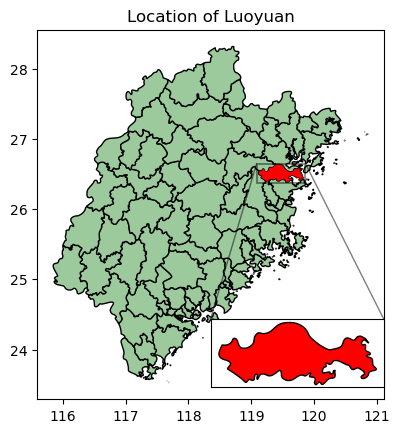

In [2]:
map_df = gpd.read_file("./shp-data/县级行政区.shp")
map_df = map_df.to_crs(epsg=4326)
luoyuan = map_df[map_df["FID"] == 54]
fig, ax = plt.subplots()
map_df.plot(edgecolor='k', facecolor='#9CCA9C', alpha=1, ax=ax)
luoyuan.plot(color='r', ax=ax)
sub_map = ax.inset_axes([0.5, 0.0, 0.5, 0.25], transform=ax.transAxes)
sub_map.grid(False)
sub_map.tick_params(which='both',
                     labelleft=False, left=False,
                     bottom=False, labelbottom=False)
insert_map = luoyuan.plot(color='r', edgecolor='k', ax=sub_map)
ax.indicate_inset_zoom(sub_map, edgecolor='k', lw=1.2)
plt.title("Location of Luoyuan")
plt.savefig("./visualization/luoyuan.pdf")

In [5]:
luoyuan.to_file("./shp-data/luoyuan.shp",
                 driver="ESRI Shapefile", encoding="utf-8")